In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cr-loan-data/cr_loan2.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/cr-loan-data/cr_loan2.csv')

In [4]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [5]:
num_cols = [feature for feature in df.columns if df[feature].dtype!='O']
cat_cols = [feature for feature in df.columns if df[feature].dtype=='O']

In [6]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [7]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [8]:
num_missing_cols = [feature for feature in num_cols if df[feature].isnull().sum()>0]

In [9]:
num_missing_cols

['person_emp_length', 'loan_int_rate']

In [10]:
for feature in num_missing_cols:
    df[feature].fillna(df[feature].median())

In [11]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [12]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [13]:
df['person_emp_length'].median()

4.0

In [14]:
for feature in num_cols:
    df[feature].fillna(df[feature].median(),inplace=True)

In [15]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

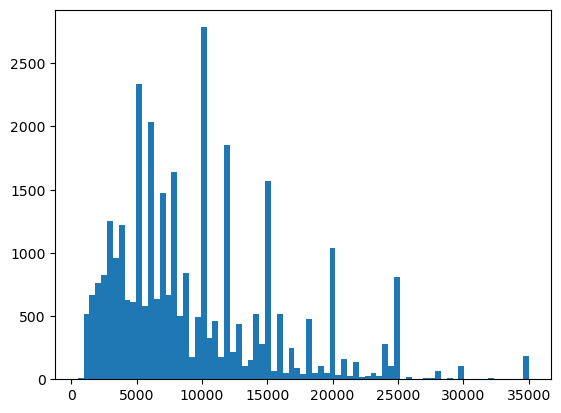

In [44]:
plt.hist(df['loan_amnt'],bins="auto")
plt.show()

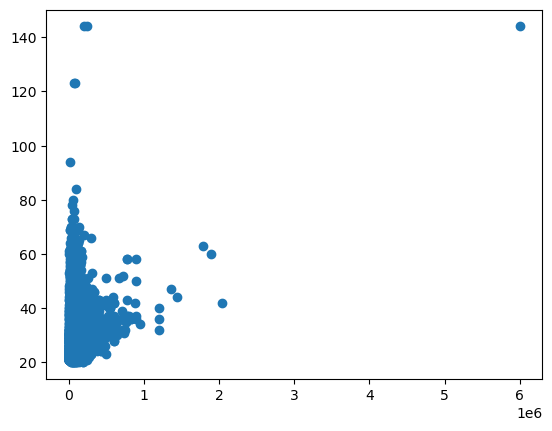

In [46]:
plt.scatter(df['person_income'],df['person_age'])
plt.show()

<Axes: title={'center': 'loan_percent_income'}, xlabel='loan_status'>

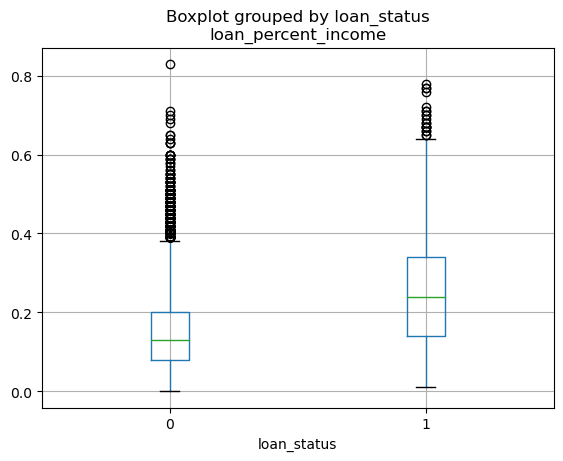

In [52]:
df.boxplot(column = "loan_percent_income",by='loan_status')

In [16]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [17]:
for feature in cat_cols:
    print(feature,df[feature].unique())

person_home_ownership ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file ['Y' 'N']


In [18]:
df.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.161454,0.050787,0.011853,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.135164,0.266820,0.000746,-0.144449,-0.254471,0.117987
person_emp_length,0.161454,0.135164,1.000000,0.113851,-0.051262,-0.082182,-0.054134,0.143069
loan_amnt,0.050787,0.266820,0.113851,1.000000,0.139483,0.105376,0.572612,0.041967
loan_int_rate,0.011853,0.000746,-0.051262,0.139483,1.000000,0.319360,0.114514,0.015762
loan_status,-0.021629,-0.144449,-0.082182,0.105376,0.319360,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054134,0.572612,0.114514,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.143069,0.041967,0.015762,-0.015529,-0.031690,1.000000


In [54]:
df1 = df.copy()

In [55]:
df1.shape

(32581, 23)

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

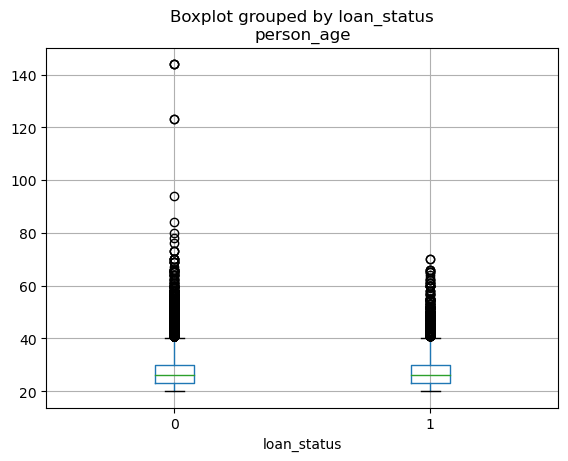

In [61]:
df.boxplot(column="person_age",by="loan_status")

In [63]:
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

person_age True
person_income True
person_emp_length True
loan_amnt False
loan_int_rate False
loan_status False
loan_percent_income False
cb_person_cred_hist_length False


In [64]:
outlier_thresholds(df,num_cols)

(person_age                       -22.500
 person_income                -301800.000
 person_emp_length                -25.500
 loan_amnt                     -42200.000
 loan_int_rate                    -14.035
 loan_status                       -1.500
 loan_percent_income               -0.700
 cb_person_cred_hist_length       -20.500
 dtype: float64,
 person_age                        93.500
 person_income                 541400.000
 person_emp_length                 42.500
 loan_amnt                      73000.000
 loan_int_rate                     37.845
 loan_status                        2.500
 loan_percent_income                1.220
 cb_person_cred_hist_length        39.500
 dtype: float64)

In [70]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

#Check
for col in num_cols:
    print(col, check_outlier(df, col))

person_age False
person_income False
person_emp_length False
loan_amnt False
loan_int_rate False
loan_status False
loan_percent_income False
cb_person_cred_hist_length False


In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,0.57,3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,30,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
32577,54,120000,4.0,17625,7.49,0.15,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
32578,65,76000,3.0,35000,10.99,0.46,28,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
32579,56,150000,5.0,15000,11.48,0.10,26,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
32377,64,46000,2.0,4800,11.09,0.10,24,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1338,26,26000,0.0,8500,16.45,0.33,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7047,23,51000,3.0,16000,13.11,0.31,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
8225,22,56004,6.0,6000,7.88,0.11,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7178,24,79000,3.0,7000,12.54,0.09,3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39,38500,7.0,3500,13.98,0.09,17,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
5390,25,69000,5.0,8500,6.92,0.12,4,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
860,26,148000,1.0,20000,17.99,0.14,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
15795,26,175000,0.0,15000,10.99,0.09,3,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[0:7] = ss.fit_transform(X_train[0:7])
X_test[0:7] = ss.fit_transform(X_test[0:7])

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier()

In [26]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
32377,2.431827,-0.472374,-0.438948,-0.860231,-0.479754,-0.666877,2.398157,0.0,-0.408248,1.581139,0.0,-0.632456,-0.408248,1.154701,0.0,0.0,0.866025,0.0,-0.408248,0.0,0.0,1.581139
1338,-0.309131,-1.653226,-0.997609,0.121266,1.675977,1.667192,-0.491426,0.0,2.449490,-0.632456,0.0,-0.632456,-0.408248,-0.866025,0.0,0.0,-1.154701,0.0,2.449490,0.0,0.0,-0.632456
7047,-0.525522,-0.177162,-0.159617,2.110788,0.332667,1.464230,-0.491426,0.0,-0.408248,-0.632456,0.0,-0.632456,-0.408248,1.154701,0.0,0.0,0.866025,0.0,-0.408248,0.0,0.0,1.581139
8225,-0.597652,0.118288,0.678374,-0.541908,-1.770779,-0.565396,-0.353827,0.0,-0.408248,-0.632456,0.0,-0.632456,2.449490,-0.866025,0.0,0.0,-1.154701,0.0,-0.408248,0.0,0.0,-0.632456
7178,-0.453391,1.476031,-0.159617,-0.276638,0.103420,-0.768358,-0.491426,0.0,-0.408248,1.581139,0.0,-0.632456,-0.408248,1.154701,0.0,0.0,0.866025,0.0,-0.408248,0.0,0.0,-0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39.000000,38500.000000,7.000000,3500.000000,13.980000,0.090000,17.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,1.000000
5390,25.000000,69000.000000,5.000000,8500.000000,6.920000,0.120000,4.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
860,26.000000,148000.000000,1.000000,20000.000000,17.990000,0.140000,3.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000
15795,26.000000,175000.000000,0.000000,15000.000000,10.990000,0.090000,3.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.000000


In [27]:
model = rfc.fit(X_train,y_train)

In [28]:
y_pred = model.predict(X_test)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [32]:
accuracy_score(y_test,y_pred)

0.9300291545189504

In [33]:
precision_score(y_test,y_pred)

0.9483227561196736

In [34]:
confusion_matrix(y_test,y_pred)

array([[5015,   57],
       [ 399, 1046]])

In [73]:
y_prob = model.predict_proba(X_test)[:,1]

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

